# Imports

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns

# Identifiant du participant

In [80]:
participant_id = input("Entrez l'identifiant du participant : ")
print("L'identifiant du participant est {}".format(participant_id))

Entrez l'identifiant du participant : 235661
L'identifiant du participant est 235661


In [81]:
def import_participant_data(participant_id, path='./data/'):
    file_pattern = f"{participant_id}_vb_task_exp_*.csv"
    files = Path(path).glob(file_pattern)

    dfs = list()
    for f in files:
        data = pd.read_csv(f)
        data['file'] = f.stem
        dfs.append(data)

    if dfs:
        df = pd.concat(dfs, ignore_index=True)
        return df
    else:
        print(f"Aucun fichier trouvé pour l'identifiant du participant {participant_id}")
        return None

df = import_participant_data(participant_id)

# Rémunération

In [82]:
df_remu = abs(df['attractiveness.response'] - df['impact'])
df_clean = df_remu.dropna()

def inverse_linear_mapping(difference, min_diff=0, max_diff=20, min_output=10, max_output=0):
    # Vérifier et ajuster les limites de la différence
    difference = max(min_diff, min(difference, max_diff))
    
    # Appliquer la transformation linéaire
    normalized_diff = (difference - min_diff) / (max_diff - min_diff)
    mapped_value = min_output + normalized_diff * (max_output - min_output)
    
    # Arrondir et retourner un entier entre 0 et 10
    return round(mapped_value)

random_sample = df_clean.sample(n=1)
result = inverse_linear_mapping(random_sample.iloc[0])
print("La rémunération pour ce joueur est de : {} euros".format(result + 5))


La rémunération pour ce joueur est de : 12 euros


# Performances générales

Durée moyenne de réponse

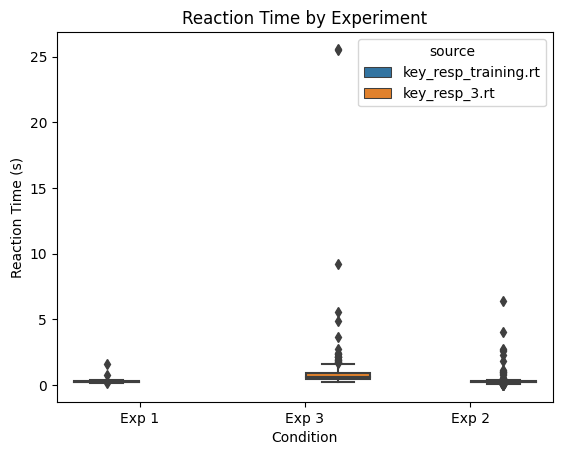

In [72]:
# Mappez les valeurs binaires sur les noms des conditions et ajoutez une condition pour les données d'entraînement
condition_mapping = {0: 'Exp 2', 1: 'Exp 3', None: 'Exp 1'}
df['condition'] = df['is_task_obs'].map(condition_mapping)

df_training = df[['key_resp_training.rt', 'condition']].dropna(subset=['key_resp_training.rt']).rename(columns={'key_resp_training.rt': 'reaction_time'})
df_training['source'] = 'key_resp_training.rt'

df_3 = df[['key_resp_3.rt', 'condition']].dropna(subset=['key_resp_3.rt']).rename(columns={'key_resp_3.rt': 'reaction_time'})
df_3['source'] = 'key_resp_3.rt'

df_combined = pd.concat([df_training, df_3], ignore_index=True)

# Créez le box plot en utilisant seaborn
sns.boxplot(x='condition', y='reaction_time', hue='source', data=df_combined)

# Personnalisez l'apparence du tracé
plt.xlabel('Condition')
plt.ylabel('Reaction Time (s)')
plt.title('Reaction Time by Experiment')

# Affichez le tracé
plt.show()

Regret cumulé

Somme cumulée redimensionnée

# Performances par condition

# Graphiques

# Analyse des erreurs

# Comparaison avec d'autres participants